In [32]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
#Read the excel file
df_data = pd.read_excel("D:\MS Data Science- Simplilearn\CSVs\Cardio_dataset.xlsx")

In [3]:
#Basic data exploration
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df_data.shape

(303, 14)

In [6]:
df_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
#Rename columns for better understanding
df_data.rename(columns= {"age":"Age", "sex":"Sex", "cp":"Chest_pain", "trestbps":"Resting_blood_pressure", "chol":"Cholesterol", "fbs":"Fasting_blood_pressure", "restecg":"ECG_result", "thalach":"Max_heart_rate", "exang":"Excercise_induced_angina", "oldpeak":"ST_depression", "slope":"Slope_peak_exercise_ST_segment", "ca":"Number_of_major_vessels", "thal":"Thalassemia_type", "target":"Heart_disease"}, inplace = True)
df_data.head(3)

,Age,Sex,Chest_pain,Resting_blood_pressure,Cholesterol,Fasting_blood_pressure,ECG_result,Max_heart_rate,Excercise_induced_angina,ST_depression,Slope_peak_exercise_ST_segment,Number_of_major_vessels,Thalassemia_type,Heart_disease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [9]:
#Check for null values
df_data.isna().sum()

Age                               0
Sex                               0
Chest_pain                        0
Resting_blood_pressure            0
Cholesterol                       0
Fasting_blood_pressure            0
ECG_result                        0
Max_heart_rate                    0
Excercise_induced_angina          0
ST_depression                     0
Slope_peak_exercise_ST_segment    0
Number_of_major_vessels           0
Thalassemia_type                  0
Heart_disease                     0
dtype: int64

In [10]:
#Checking type and count of target("Heart_disease")
df_data["Heart_disease"].value_counts()

1    165
0    138
Name: Heart_disease, dtype: int64

<AxesSubplot:title={'center':'Count of diagnosis of heart diseases'}>

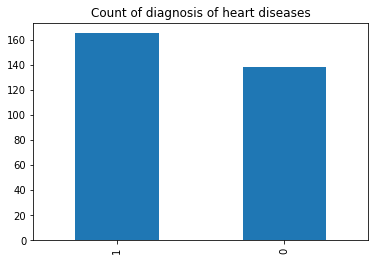

In [11]:
df_data["Heart_disease"].value_counts().plot(kind = "bar", title = "Count of diagnosis of heart diseases")

<AxesSubplot:title={'center':'CVD w.r.t Age'}, ylabel='Frequency'>

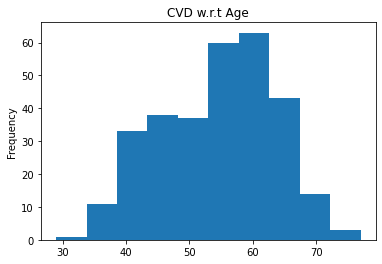

In [14]:
#Study the occurrence of CVD across the Age category
df_data["Age"].plot(kind = "hist", title = "CVD w.r.t Age")

<AxesSubplot:title={'center':'CVD w.r.t Sex'}>

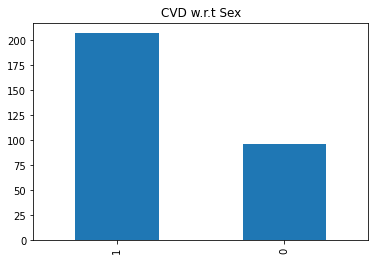

In [15]:
#Study the composition of all patients with respect to the Sex category
df_data["Sex"].value_counts().plot(kind = "bar", title = "CVD w.r.t Sex")

In [16]:
#Study if one can detect heart attacks based on anomalies in the resting blood pressure (trestbps) of a patient
df_data["Resting_blood_pressure"].value_counts()

120    37
130    36
140    32
110    19
150    17
138    13
128    12
160    11
125    11
112     9
132     8
118     7
124     6
135     6
108     6
152     5
134     5
145     5
122     4
170     4
100     4
105     3
126     3
115     3
180     3
136     3
142     3
102     2
148     2
178     2
94      2
144     2
146     2
200     1
114     1
154     1
123     1
192     1
174     1
165     1
104     1
117     1
101     1
156     1
106     1
155     1
129     1
172     1
164     1
Name: Resting_blood_pressure, dtype: int64

<AxesSubplot:title={'center':'CVD w.r.t Resting blood pressure'}, xlabel='Resting_blood_pressure'>

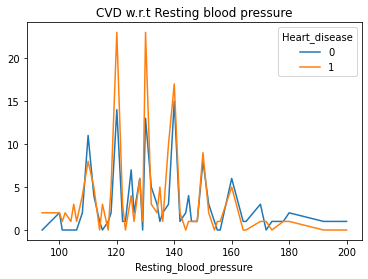

In [18]:
pd.crosstab(df_data["Resting_blood_pressure"], df_data["Heart_disease"]).plot(title="CVD w.r.t Resting blood pressure")

In [19]:
#State what relationship exists between peak exercising and the occurrence of a heart attack
df_data["Excercise_induced_angina"].value_counts()

0    204
1     99
Name: Excercise_induced_angina, dtype: int64

<AxesSubplot:xlabel='Excercise_induced_angina'>

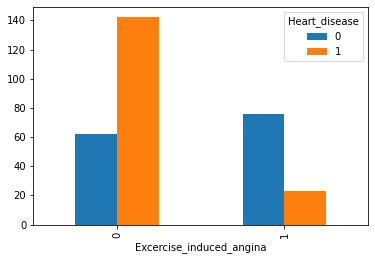

In [20]:
pd.crosstab(df_data["Excercise_induced_angina"], df_data["Heart_disease"]).plot(kind = "bar")

In [21]:
#Check if thalassemia is a major cause of CVD
df_data["Thalassemia_type"].value_counts()

2    166
3    117
1     18
0      2
Name: Thalassemia_type, dtype: int64

<AxesSubplot:xlabel='Thalassemia_type'>

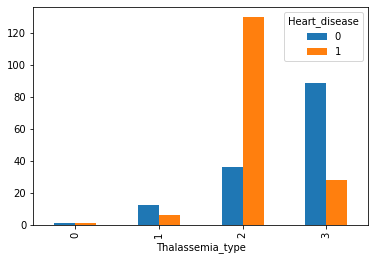

In [22]:
pd.crosstab(df_data["Thalassemia_type"], df_data["Heart_disease"]).plot(kind = "bar")

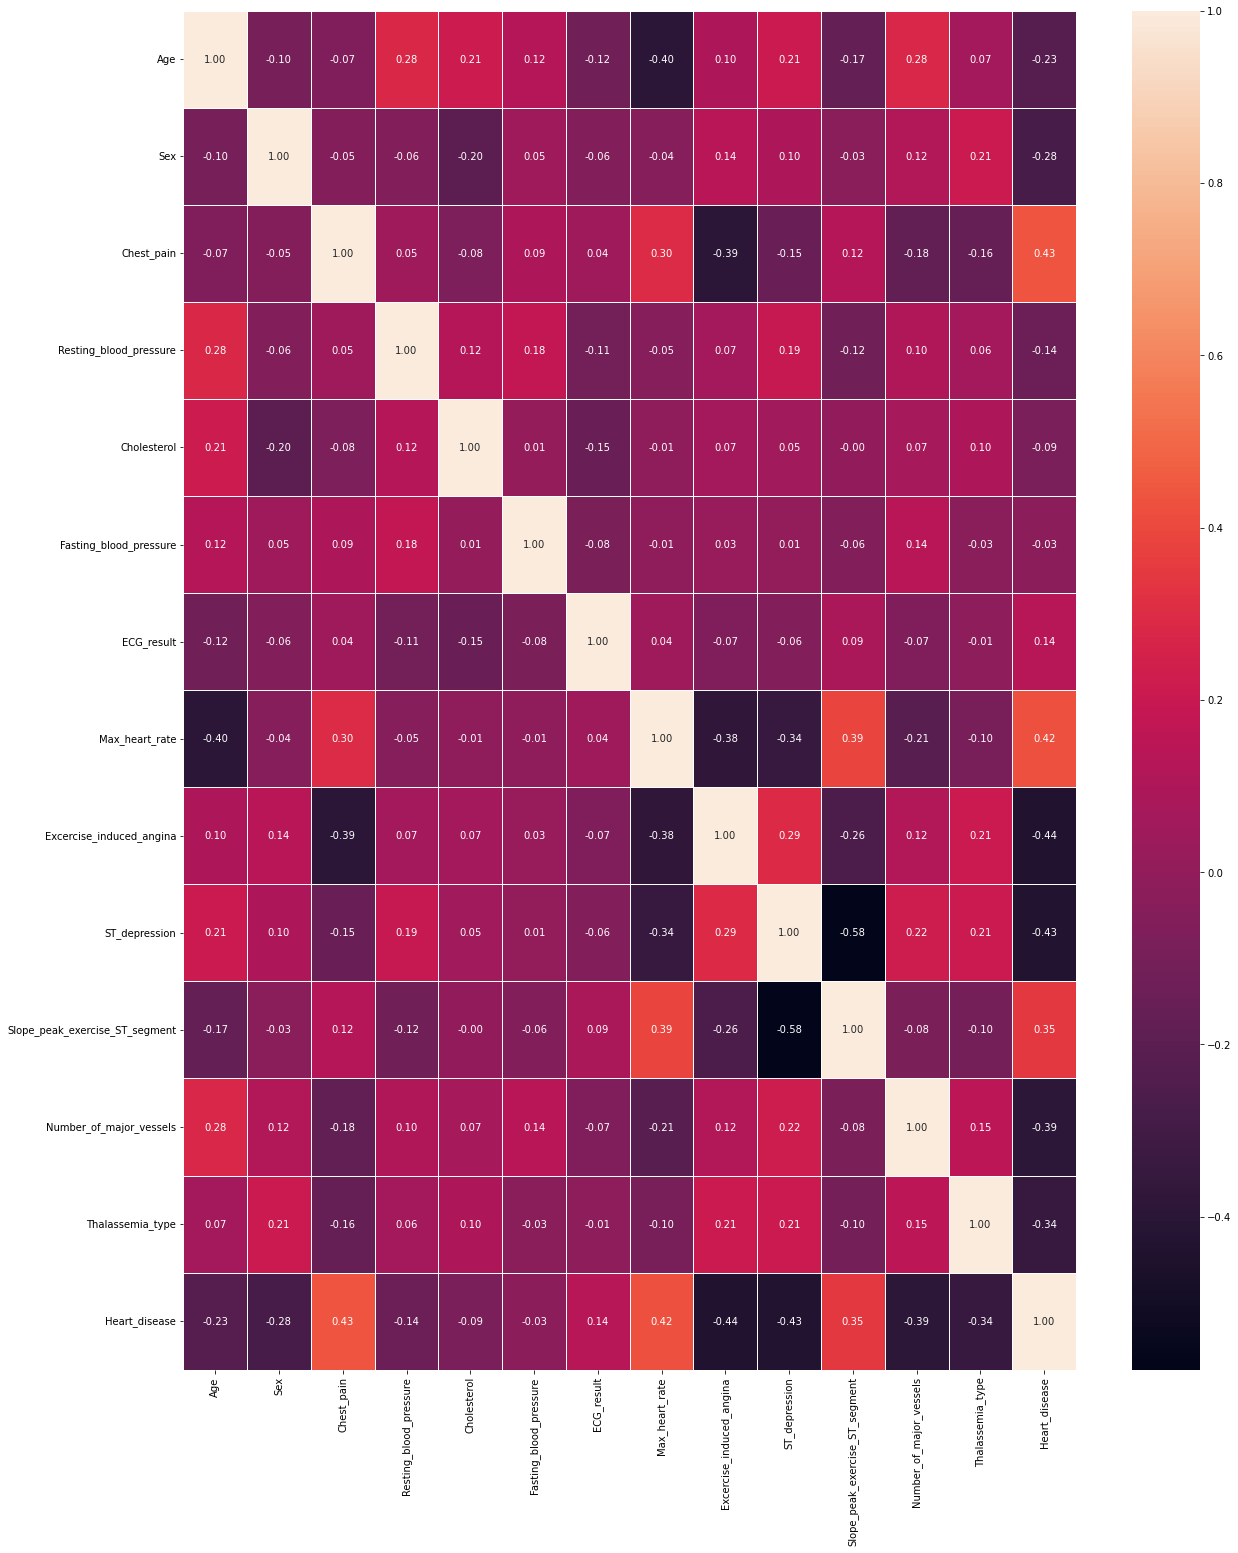

In [23]:
#List how the other factors determine the occurrence of CVD
mat_corr = df_data.corr()
fig, ax = plt.subplots(figsize = (20, 25))
ax = sns.heatmap(mat_corr, annot = True, linewidths = 0.5, fmt = ".2f")

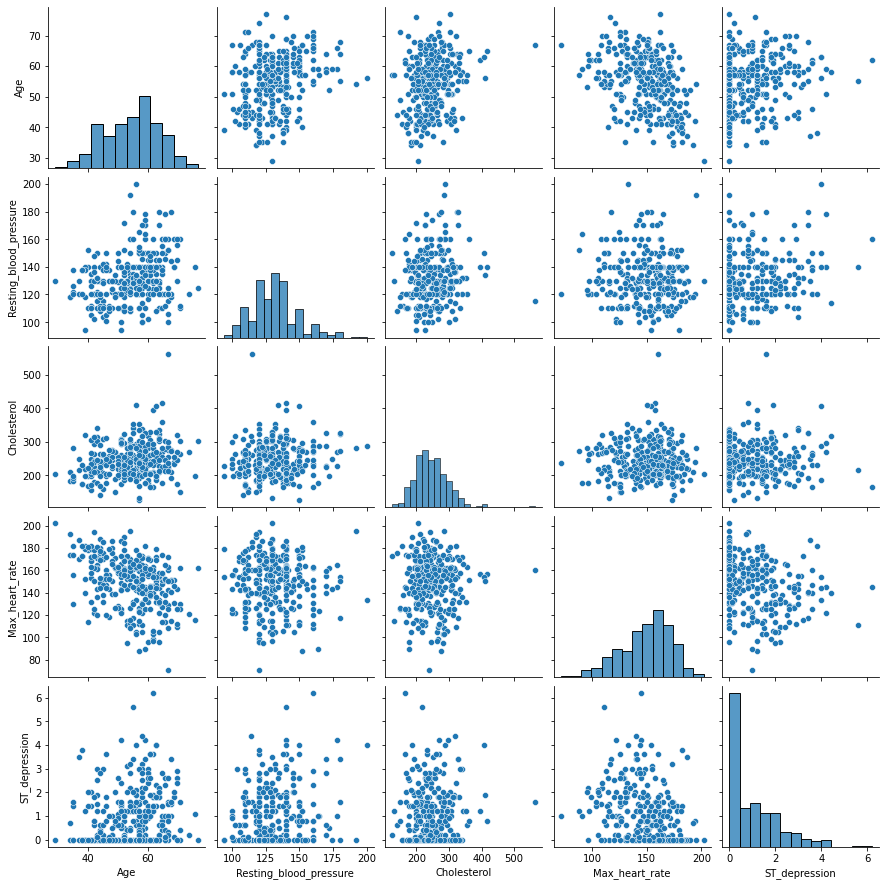

In [44]:
#Use a pair plot to understand the relationship between all the given variables
subData = df_data[['Age','Resting_blood_pressure','Cholesterol','Max_heart_rate','ST_depression']]
sns.pairplot(subData)

In [25]:
#Build a baseline model to predict the risk of a heart attack using a logistic regression and random forest 
#and explore the results while using correlation analysis and logistic regression (leveraging standard error and p-values from statsmodels) for feature selection

In [26]:
X = df_data.drop("Heart_disease", axis = 1)
y = df_data["Heart_disease"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [27]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

C:\Users\karso\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
lr.score(X_train, y_train)

0.8636363636363636

In [29]:
lr_y_pred = lr.predict(X_test)

In [30]:
lr.score(X_test, y_test)

0.8852459016393442

In [33]:
print(classification_report(y_test, lr_y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [34]:
rf = RandomForestClassifier()

In [35]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [36]:
rf.score(X_train, y_train)

1.0

In [37]:
rf_y_pred = rf.predict(X_test)

In [38]:
rf.score(X_test, y_test)

0.8524590163934426

In [39]:
print(classification_report(y_test, rf_y_pred))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [40]:
model_score = {"Logistic Regression":lr.score(X_test, y_test),
               "Random Forest":rf.score(X_test, y_test)}
model_score

{'Logistic Regression': 0.8852459016393442,
 'Random Forest': 0.8524590163934426}

In [41]:
model_compare = pd.DataFrame(model_score, index =["Accuracy"])
model_compare

,Logistic Regression,Random Forest
Accuracy,0.885246,0.852459


<AxesSubplot:>

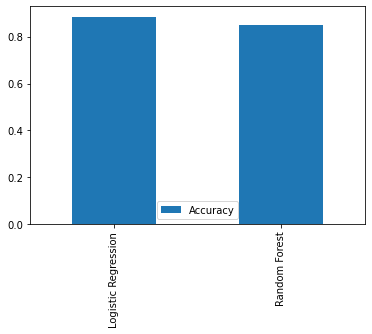

In [42]:
model_compare.T.plot(kind="bar")